In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Array Handling

`numpy` is going to become you best friend for dealing with data in python.

In [2]:
x = np.array([1,4,6,7])

Easy to do operations

In [3]:
y = x**2 * np.sin(x) + np.exp(x)
y

array([   3.55975281,   42.48931011,  393.36983556, 1128.82550177])

Easy to create base arrays

In [4]:
x = np.zeros(5)
x

array([0., 0., 0., 0., 0.])

In [5]:
x = np.ones(10) / 2
x

array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])

In [6]:
x = np.linspace(0,10,100)

In [7]:
x = np.arange(0, 10, 0.01)

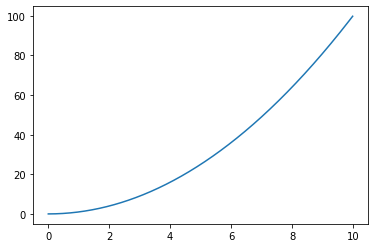

In [8]:
plt.plot(x, x**2)

Numpy gets complicated when arrays become multidimensional

### Multi Dimesional Arrays

In [9]:
x = np.ones((10,10))

The `.shape` attribute of arrays is going to save you infinite headaches in the future
* whenever you load in a new array, use ut

In [10]:
x.shape

(10, 10)

Can make arrays of arbitrarily strange shape:

In [11]:
x = np.ones((3,5,2,5,3,1))

Slice indexing

In [12]:
x[:,:,0].shape

(3, 5, 5, 3, 1)

In machine learning, one can often deal with 5D arrays
* Example below: 10 3D images (MRI), 3 feature maps each, width and height both 256, 100 slices.

In [13]:
X = np.ones((10,3,256,256,100))
X.shape

(10, 3, 256, 256, 100)

Suppose you want the 3rd feature map of the 2nd image.

In [14]:
X[1,2].shape

(256, 256, 100)

Now suppose you want the 95th slice:

In [15]:
X[1,2,:,:,94].shape

(256, 256)

### Reshaping

Arrays can also be reshaped to have different dimensions, as long as they're the same size

In [16]:
x = np.arange(20)
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [17]:
result = x.reshape(2,5,2)
result

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7],
        [ 8,  9]],

       [[10, 11],
        [12, 13],
        [14, 15],
        [16, 17],
        [18, 19]]])

Note the order in which the elements are filled

In [18]:
result[0,1,0]

2

### The Broadcasting Rules

Two arrays can be "multiplied" if their dimensions are compatible.
* To determine if dimensions are compatible, start with the rightmost dimension of both arrays, and work your way left. Two dimensions are compatible if 1. they are equal or 2. one of them is 1

Lets go through some examples... (if you're just reading the notebook, watch the youtube video)

In [19]:
a = np.ones((8,1,6,1))
b = np.ones((1,4,1,1))

If the two arrays aren't the same size, the smaller one is assumed to be filled with ones to the left

In [20]:
a = np.ones((1,6,1))
b = np.ones((1,4,1,1))

In [21]:
result=a*b
result


array([[[[1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.]]]])

In [22]:
result.shape

(1, 4, 6, 1)

Why is this useful? Need to see examples:

### Example
You're tracking the position $\vec{r}$ of 10 different particles. You want to multiply the $x$ coordinate by 2, $y$ coordinate by 4, and $z$ coordinate by 3.

In [23]:
r = np.random.randn(10,3)
r

array([[-1.00970117,  0.92554046,  1.60206964],
       [ 1.27917529, -0.61113079,  0.77473196],
       [ 0.65583883,  0.85233891,  1.33183025],
       [-0.92727365,  0.61670502, -0.08017781],
       [ 0.26558638,  2.03350808, -1.47560748],
       [ 0.7994761 ,  0.95646916, -0.16657476],
       [-0.18611039, -1.13076162,  0.62496748],
       [ 0.27992061,  0.79398157, -0.39893305],
       [-0.86022572,  0.35350312, -0.59961706],
       [ 0.86707804,  0.24927095,  0.04577242]])

In [24]:
r[1]

array([ 1.27917529, -0.61113079,  0.77473196])

In [25]:
r.shape

(10, 3)

In [26]:
C = np.array([2,4,3])
C.shape

(3,)

The shapes are compatible, so we can multiply them together, modifying each component seperately.

In [27]:
C*r

array([[-2.01940234,  3.70216184,  4.80620891],
       [ 2.55835059, -2.44452315,  2.32419588],
       [ 1.31167766,  3.40935563,  3.99549076],
       [-1.8545473 ,  2.46682007, -0.24053343],
       [ 0.53117276,  8.13403233, -4.42682244],
       [ 1.59895221,  3.82587666, -0.49972427],
       [-0.37222077, -4.52304646,  1.87490245],
       [ 0.55984122,  3.17592628, -1.19679916],
       [-1.72045144,  1.41401246, -1.79885118],
       [ 1.73415609,  0.99708381,  0.13731726]])

More examples on this after we learn the next concept...

### Operating on the axes of numpy arrays

Sometimes one can apply an operation on a 1D array to get a number
* sum numbers together
* take standard deviation

In [28]:
x = np.arange(0,10,1)

In [29]:
np.sum(x)

45

In a 2D array, you can apply these "reduction" operations along certain axes only.

In [30]:
x = np.random.rand(3,10)
x.shape

(3, 10)

Suppose each of the 3 rows is a certain person, and the 10 measurements constitute measurements of their reaction time. You want to find the standard deviation of each persons reaction time:

In [31]:
np.std(x)

0.2687862434262836

No good, takes the standard deviation of all values. Lets do it for the 10 measurements only
* Look at the shape of the array. Each axis is (axis0, axis1, axis2, ...)

In [32]:
np.std(x, axis=1)

array([0.23719448, 0.27415759, 0.28804552])

Maybe we have a 2D color image
* Has dimensions $H \times W \times C$ where $H$ and $W$ are the height and width and $C$ is the color channels (typically 3)

In [33]:
x = np.random.rand(256,256,3)

(256, 256, 3)

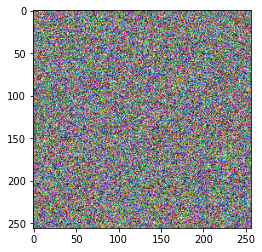

In [34]:
plt.imshow(x)
x.shape

(256, 3)

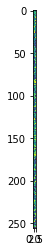

In [35]:
plt.imshow(x[0])
x[0].shape


(10, 256, 3)

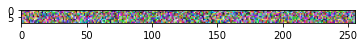

In [36]:
plt.imshow(x[0:10])
x[0:10].shape


We want to find the standard deviation between the 3 color channels for each pixel in the array

In [37]:
x.shape

(256, 256, 3)

In [38]:
result = np.std(x, axis = 2)
result

array([[0.16987485, 0.15363539, 0.16889749, ..., 0.10342147, 0.18155859,
        0.28254445],
       [0.38885706, 0.13919061, 0.2603538 , ..., 0.19226191, 0.07961915,
        0.16892275],
       [0.25987353, 0.19029106, 0.22467601, ..., 0.04617093, 0.16218977,
        0.25487154],
       ...,
       [0.24712525, 0.29391526, 0.18030643, ..., 0.15629583, 0.39224008,
        0.30421759],
       [0.07480539, 0.27972637, 0.28435823, ..., 0.32450892, 0.24431462,
        0.29180999],
       [0.22693348, 0.32947973, 0.31959849, ..., 0.31932185, 0.10643247,
        0.14479158]])

Always check the result has the shape you expect

In [39]:
result.shape

(256, 256)

Good: must have taken the standard deviation across pixels.

# Examples

These examples combine all the concepts we've learned above, and commonly show up in applications

### Example 1
Suppose You have 3 rats, and they can choose to eat out of 20 different feeding containers. In 1 dat, you count the number of times each rat eats out of each container. For each of the rats, you want the probability that they feed out of each of the containers
* you have a 3x20 array. Normalize the array so that the sum along the second axis = 1.

In [40]:
x = np.random.randint(low=0,high=7, size=(3,20))
x

array([[4, 6, 3, 5, 4, 1, 3, 2, 0, 5, 6, 0, 0, 6, 5, 4, 6, 4, 6, 3],
       [4, 4, 0, 3, 2, 4, 2, 1, 6, 6, 0, 4, 2, 1, 6, 0, 3, 0, 1, 4],
       [3, 1, 4, 0, 5, 6, 4, 5, 1, 1, 1, 1, 4, 3, 4, 2, 1, 0, 5, 4]])

In [41]:
x.sum(axis=1)

#x/x.sum(axis=1)


array([73, 53, 55])

We need to reshape this (3) array so we can divide the (3,20) array by it

In [42]:
result = x / x.sum(axis=1).reshape(3,1)
#result

Then you can plot these probabilities

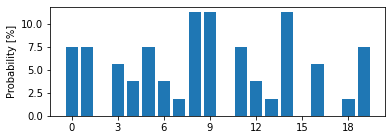

In [43]:
from matplotlib.ticker import MaxNLocator

plt.figure(figsize=(6,2))
plt.bar(np.arange(20),result[1]*100)
plt.ylabel('Probability [%]')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

### Example 2

You have an array containing the blood pressure of a turtle every 6 hours (4 measurements per day). You've taken 100 measurements (25 days). Compute the mean blood pressure of the turtle each day
* you have an array $x$ of length 100. You want to take the mean value for groups of 4 measurements

In [44]:
x = np.random.randint(low=50, high=70, size=100)
x

array([62, 65, 52, 51, 65, 66, 53, 57, 52, 50, 56, 62, 61, 64, 60, 57, 55,
       58, 64, 51, 57, 64, 54, 51, 54, 60, 50, 68, 62, 50, 58, 57, 64, 58,
       67, 50, 64, 50, 69, 50, 67, 60, 54, 62, 69, 61, 66, 53, 55, 54, 55,
       52, 54, 58, 69, 53, 51, 54, 59, 62, 62, 56, 56, 66, 55, 59, 66, 66,
       64, 50, 59, 58, 62, 51, 65, 51, 64, 61, 53, 69, 63, 54, 68, 69, 61,
       54, 52, 60, 60, 62, 66, 61, 62, 52, 55, 55, 54, 65, 59, 57])

In [45]:
# reshape to get 4 measures by day
r=x.reshape((-1,4))     # -1 means 25
r.shape


(25, 4)

In [46]:
result = x.reshape((-1,4)).mean(axis=-1) # axis=-1 action on the last or the second series of data (4 measurements) 
result

array([57.5 , 60.25, 55.  , 60.5 , 57.  , 56.5 , 58.  , 56.75, 59.75,
       58.25, 60.75, 62.25, 54.  , 58.5 , 56.5 , 60.  , 61.5 , 57.75,
       57.25, 61.75, 63.5 , 56.75, 62.25, 56.  , 58.75])

### Example 3

You have four 256x256 images which have 3 color channels each. Set the green color channel (index 2) of all images to the green color channel of the first image

In [47]:
x = np.random.randn(4,3,256,256)


Green color channel of all images bcomes green color channel of first image:

In [48]:
x[:,2,:,:] = x[0,2,:,:]

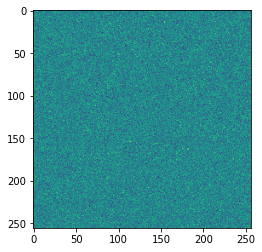

In [49]:
plt.imshow(x[0,2])